# MSc Data Science and Analytics 2024 Scholarship Award Exam

## Data Description
The data contains `80 variables` that characterise the demographic and socio-economic situation of 181 galaxis over a period of at most 26 years. A composite index that measures the `well-being` of the galaxies has been given. However, the demographic and socio-economic variables that influence this index is not known.

## Research Question:
### `What makes the galaxies better off?` i.e:
- Which Variables best explains the variance of the well-being index?

## Research Task:
### `Determine the future well-being values of the galaxies`

## Import the required dependencies

In [1]:
import pandas as pd # imports the pandas library
import numpy as np # imports the numpy library
import matplotlib.pyplot as plt # imports the matplotlib library
import seaborn as sns # Imports the seaborn library

# Allows visualizations to be displaying inline in the notebook
%matplotlib inline

pd.set_option("display.max_columns", None);

# Load the data into pandas dataframes

In [2]:
# Load the train data into a pandas dataframe
train_df = pd.read_csv("data/MSC DSA Scholars Exam Data (1)/Data/Train_data.csv")

# Load the validation data into a pandas dataframe
validation_df = pd.read_csv("data/MSC DSA Scholars Exam Data (1)/Data/Validation.csv")

# Assessment, Cleaning, and Manipulation (EDA tasks)

## Display the first few records of the train data to gain an insight of how the data looks like.

In [3]:
train_df.head(4)

ID  galactic year                       galaxy  \
0  10065        1002001                     Antlia B   
1  10087         999000  KKH 11 (ZOAG G135.74-04.53)   
2  10141         993012                 Leo IV Dwarf   
3  10168         995006                      NGC 185   

   existence expectancy index  existence expectancy at birth  \
0                    0.624015                      56.397241   
1                    0.970048                      80.924094   
2                    0.995540                      82.441006   
3                    1.004362                      75.635986   

   Gross income per capita  Income Index  \
0              17649.87156      0.458599   
1              11409.94296      0.757218   
2              58774.29343      1.032429   
3              34960.41911      0.707776   

   Expected years of education (galactic years)  \
0                                      7.857841   
1                                     15.869798   
2                                     17.545117   
3                                     13.578086   

   Mean years of education (galactic years)  \
0                                  5.196527   
1                                 13.065734   
2                                 11.399711   
3                                       NaN   

   Intergalactic Development Index (IDI)  Education Index  \
0                               0.507534         0.471400   
1                               0.807108         0.837559   
2                               0.973684         0.890396   
3                                    NaN              NaN   

   Intergalactic Development Index (IDI), Rank  \
0                                   247.196654   
1                                   137.299057   
2                                    74.709302   
3                                          NaN   

   Population using at least basic drinking-water services (%)  \
0                                          33.135967             
1                                                NaN             
2                                                NaN             
3                                                NaN             

   Population using at least basic sanitation services (%)  \
0                                          58.079357         
1                                                NaN         
2                                                NaN         
3                                                NaN         

   Gross capital formation (% of GGP)  Population, total (millions)  \
0                                 NaN                           NaN   
1                                 NaN                           NaN   
2                                 NaN                           NaN   
3                            9.558559                    700.239666   

   Population, urban (%)  Mortality rate, under-five (per 1,000 live births)  \
0                    NaN                                                NaN    
1                    NaN                                                NaN    
2                    NaN                                                NaN    
3              51.742205                                          62.363792    

   Mortality rate, infant (per 1,000 live births)  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                       83.018073   

   Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))  \
0                                                NaN                                  
1                                                NaN                                  
2                                                NaN                                  
3                                           25.90051                                  

   Population, ages 15â€“64 (mill

## Check the number of records and variables per record in the train_dt dataframe

In [4]:
train_df.shape

(3097, 81)

#### Assessment Remark:
1. The original train dataframe has `3097 records`, each having `81 variables` including the index column

## check for duplicates in the train data

In [11]:
train_df.duplicated().sum()

0

#### Assessment finding 1
The data has no duplicated records

## Check the datatype and the number of non-null entries in every column of the train_df dataframe

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       3097 non-null   int64  
 1   galactic year                                                                            3097 non-null   int64  
 2   galaxy                                                                                   3097 non-null   object 
 3   existence expectancy index                                                               3096 non-null   float64
 4   existence expectancy at birth                                                            3096 non-null   float64
 5   Gross income per capita                                       

#### Assessment finding(s) 2
1. The original train dataframe has `3097 records`, each having `81 variables` including the index column
2. The `galactic year` column is of type `Integer` and the `galaxy column` is of type `object`. Every `other` column has `float` as the datatype.
3. Most of the columns in the train Dataset contain missing values.
4. 

#### Cleaning Remark 2
1. For the data to be usable for modeling, it is necessary to deal with the null entries. However, at this point we do not have enough info to decide whether the missing records should be filled with the mean of the entire column, or be treated as 0. Therefore, we need to gain more insight by observing the correlation between the dependent variable and the independent variables.

## Cleaning Task
### Check for correlation between the different columns in the dataframe as suggested in `Cleaning Remark 2`

Since the `ID` and `galaxy` Columns are not meaningful for calculating the correlation between the variables, they can be dropped for the purpose of generating the correlation matrix.

In [12]:
# Drop the 'ID' and 'galaxy' and create a new dataframe for generating the correration matrix
correlational_df = train_df.drop(["ID", "galaxy"], axis=1)

In [13]:
corr_matrix = correlational_df.corr()

In [14]:
plt.figure(figsize=(100,100))
sns.heatmap(corr_matrix, annot=True, cmap='inferno');

#### Assessment Finding 3.
1. There is very low correlation between some of the independent variables and the dependent variable (well-being index)

#### Cleaning remark 3
1. Drop the variables that have very low correlation with the dependent variable

## Cleaning Task
#### Drop the columns that have very low correlation with the dependent variable as suggested in `Cleaning remark 3`.

In [ ]:
# Write your code here

## Display the descriptive statistis of all the columns that hold numerical data in the train dataframe

In [6]:
train_df.describe()

ID  galactic year  existence expectancy index  \
count    3097.000000   3.097000e+03                 3096.000000   
mean   157659.407168   9.984641e+05                    0.863193   
std    230716.474733   5.417848e+03                    0.164595   
min     10065.000000   9.900250e+05                    0.227890   
25%     38554.000000   9.940090e+05                    0.749559   
50%     67570.000000   9.980010e+05                    0.899075   
75%     95992.000000   1.003002e+06                    0.985961   
max    998085.000000   1.011030e+06                    1.204456   

       existence expectancy at birth  Gross income per capita  Income Index  \
count                    3096.000000              3069.000000   3069.000000   
mean                       76.197777             31175.236021      0.819082   
std                        10.539559             18574.375226      0.194201   
min                        34.244062              -126.906521      0.292001   
25%                        69.055828             19876.218060      0.672132   
50%                        78.482889             26058.342360      0.821124   
75%                        84.135993             36351.451720      0.962507   
max                        99.593905            132861.542800      1.361883   

       Expected years of education (galactic years)  \
count                                   2968.000000   
mean                                      14.442264   
std                                        3.622899   
min                                        3.799663   
25%                                       12.307716   
50%                                       14.700321   
75%                                       16.845018   
max                                       25.303770   

       Mean years of education (galactic years)  \
count                               2742.000000   
mean                                  10.058239   
std                                    3.265167   
min                                    1.928166   
25%                                    7.482265   
50%                                   10.129151   
75%                                   12.593958   
max                                   19.057648   

       Intergalactic Development Index (IDI)  Education Index  \
count                            2716.000000      2716.000000   
mean                                0.793514         0.731124   
std                                 0.176389         0.198845   
min                                 0.273684         0.189874   
25%                                 0.658223         0.582499   
50%                                 0.813372         0.748034   
75%                                 0.926053         0.881367   
max                                 1.186909         1.209059   

       Intergalactic Development Index (IDI), Rank  \
count                                  2678.000000   
mean                                    132.016588   
std                                      50.738367   
min                                       9.925906   
25%                                      90.538437   
50%                                     132.204365   
75%                                     171.156043   
max                                     278.786613   

       Population using at least basic drinking-water services (%)  \
count                                        1286.000000             
mean                                          101.094751             
std                                            20.717673             
min                                            33.135967             
25%                                            88.814961             
50%                                           107.649896             
75%                                           116.279699             
max                                           135.939397             

       Population using at least basic san

### Assessment Findings 4
1. Some of the columns, despite the column header indicating that they hold percentages, have some of the entries greater than 100.
2. 

### Cleaning Remarks 4
1. From the observation that `Some of the columns, despite the column header indicating that they hold percentages, have some of the entries greater than 100`, The affected columns should have their headers renamed to match the data they hold. e.g Rename the `Population using at least basic drinking-water services (%)` column to `Population using at least basic drinking-water services (millions)`
2. 

## Cleaning task
### Rename the affected columns as suggested in `Cleaning task 4`

In [7]:
train_df = train_df.rename(columns={
    "Population using at least basic drinking-water services (%)":"Population using at least basic drinking-water services (millions)",
    "Population, urban (%)":"Population, urban (millions)"
    
})

## Check whether the variables in the dataframe are normally distributed
This can be achieved by generating histograms for every column in the dataframe.

/tmp/ipykernel_61245/4185370060.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure();


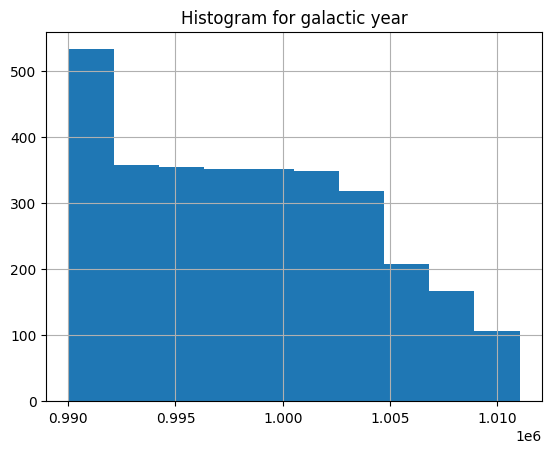

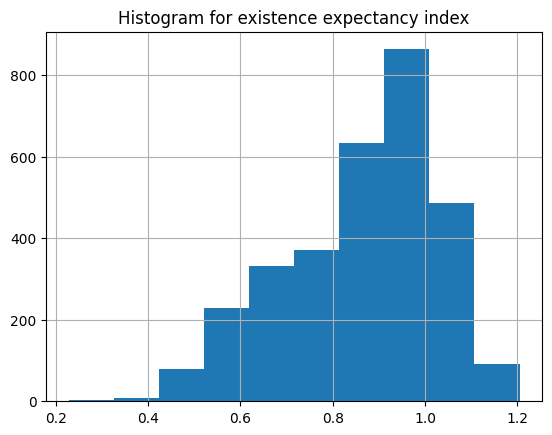

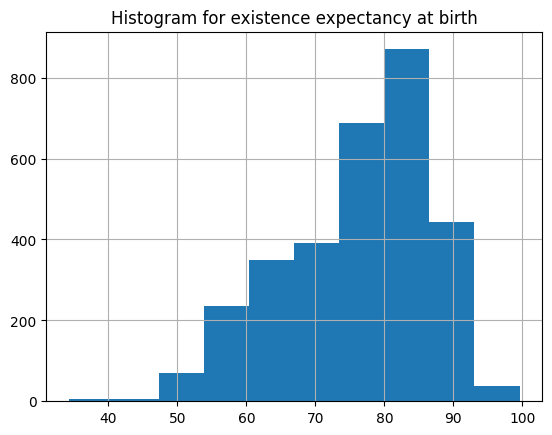

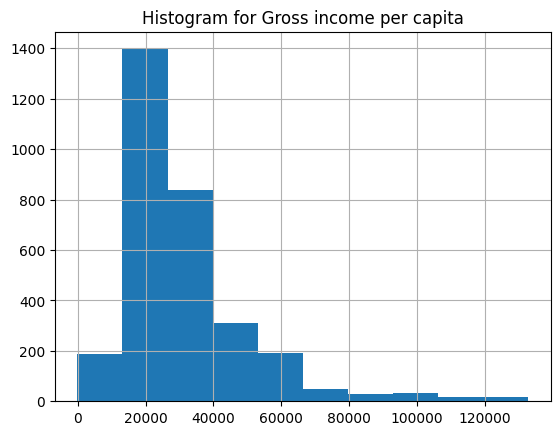

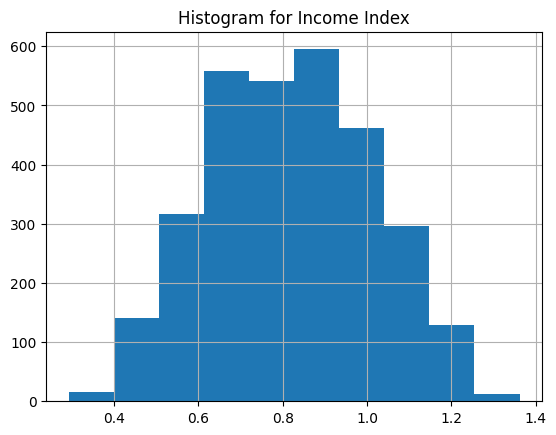

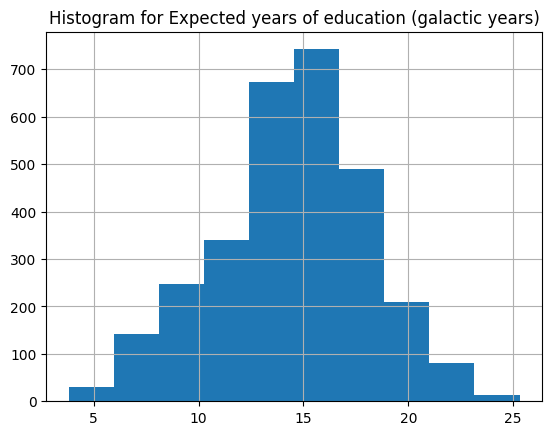

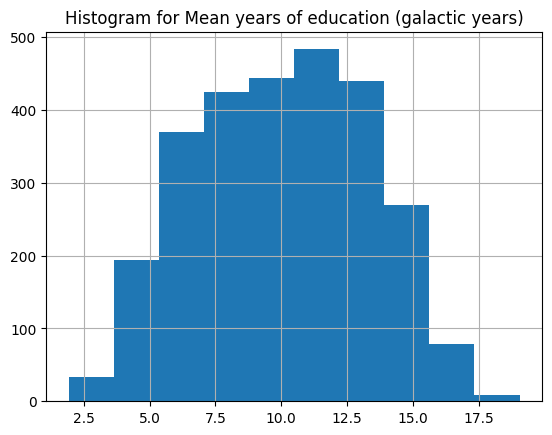

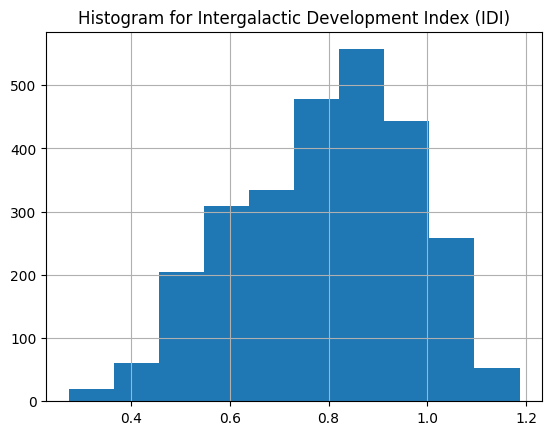

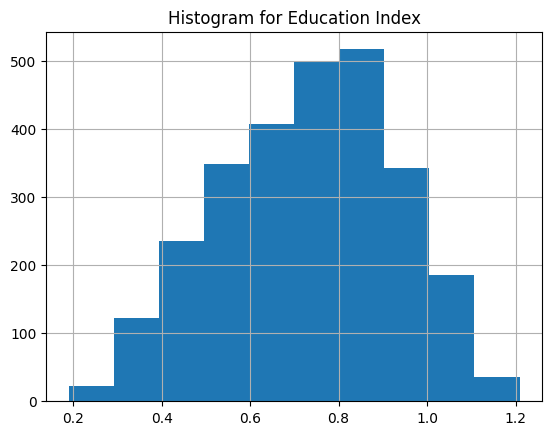

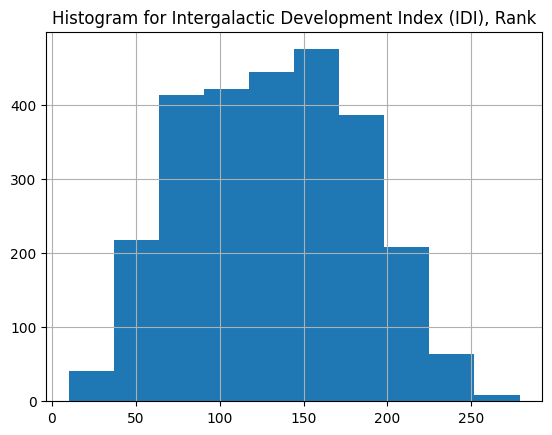

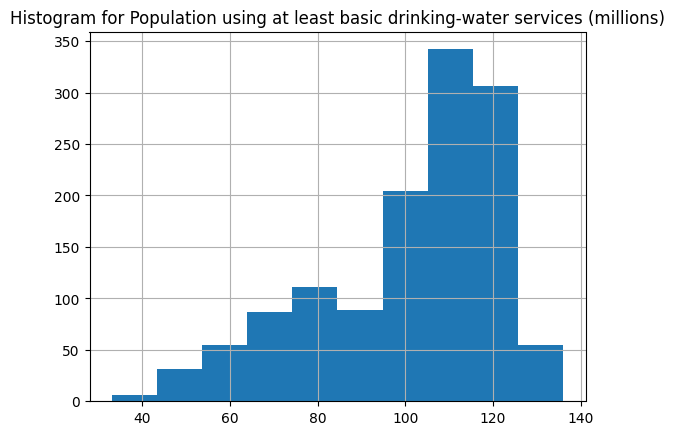

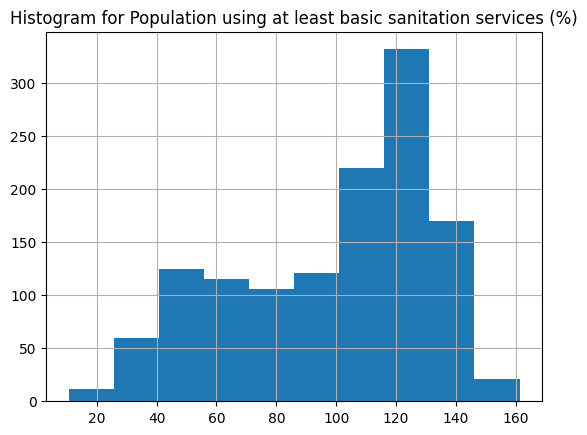

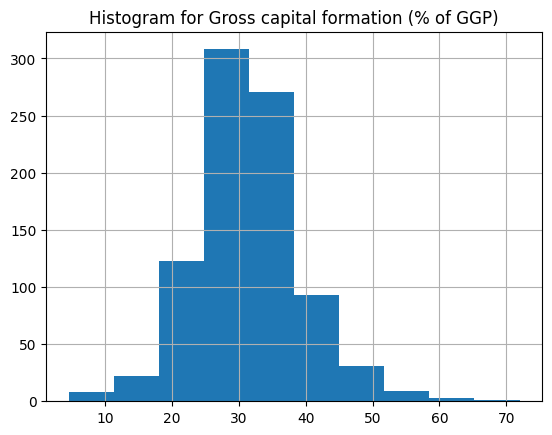

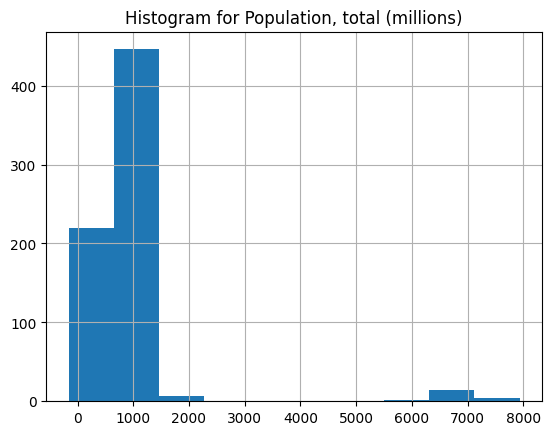

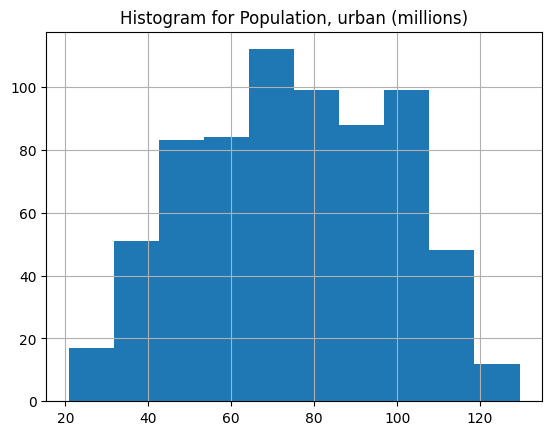

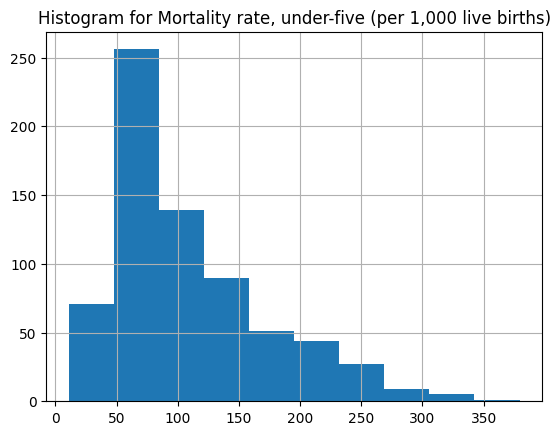

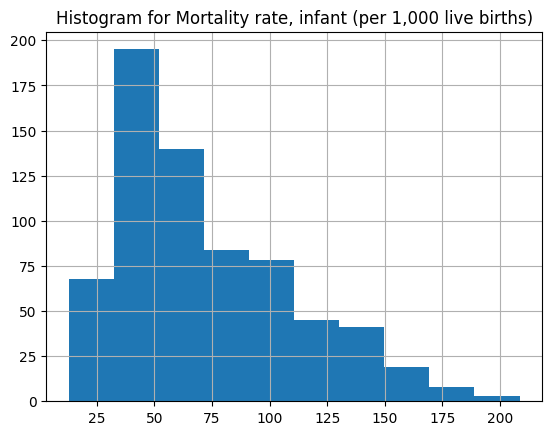

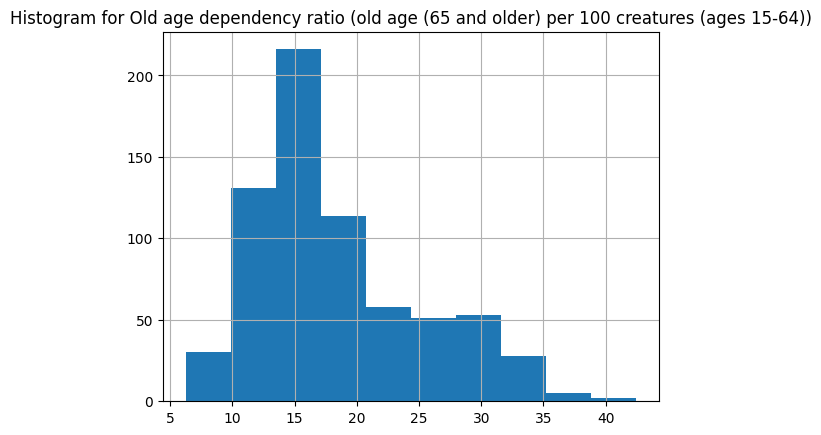

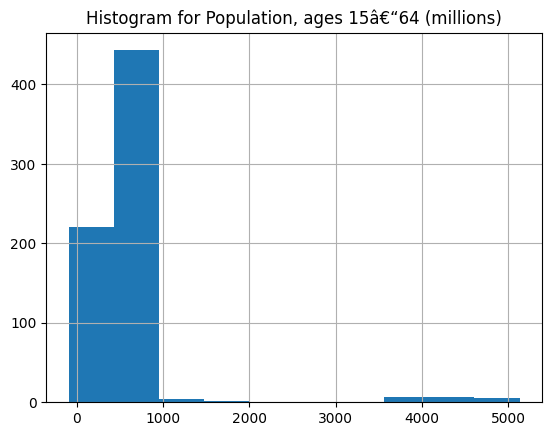

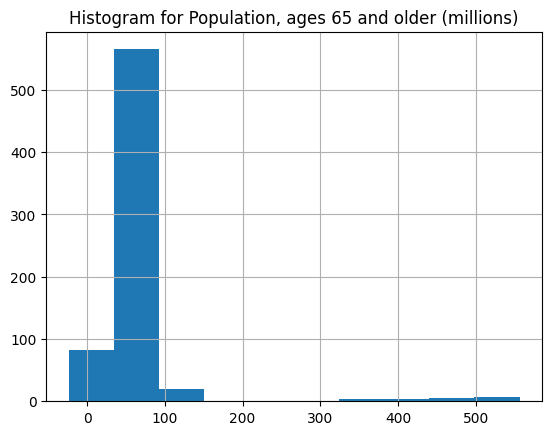

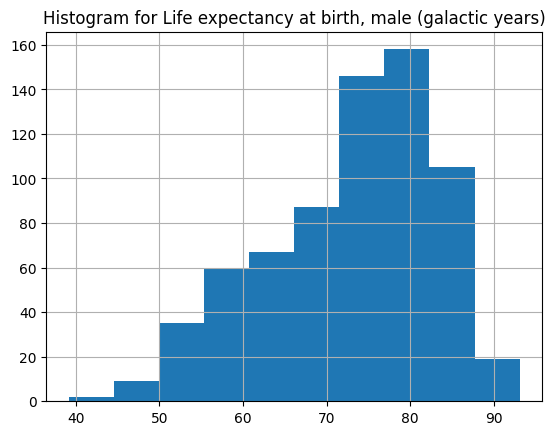

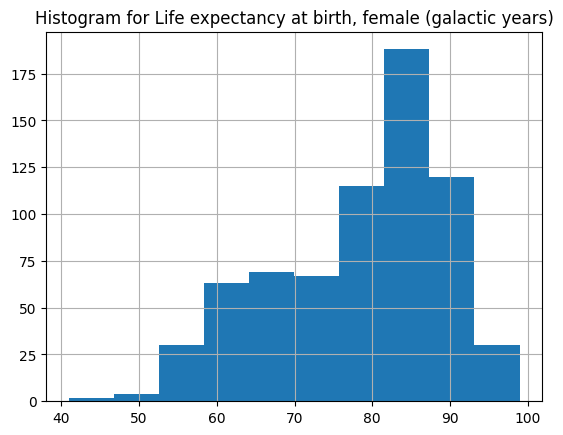

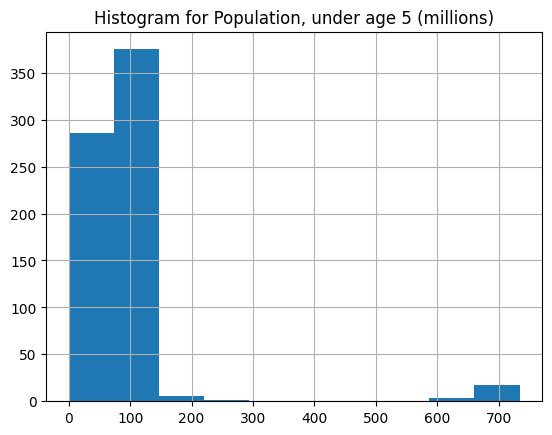

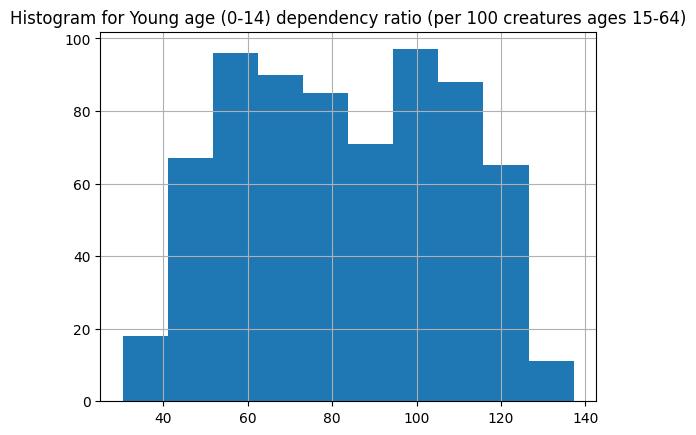

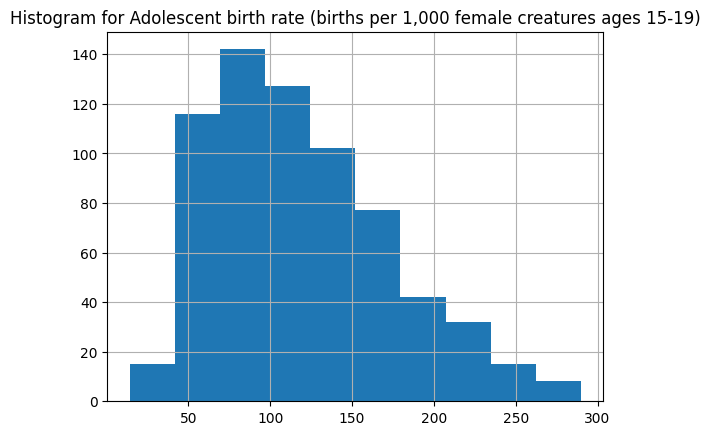

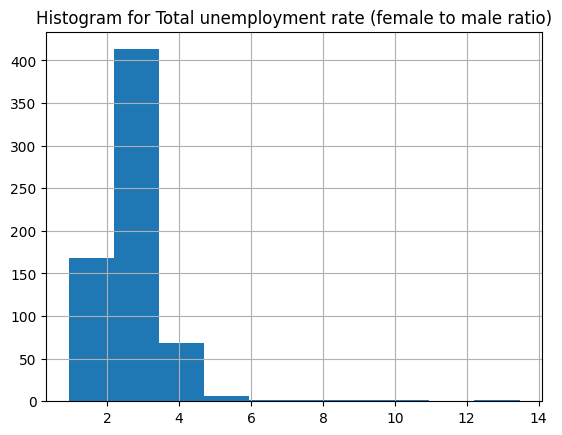

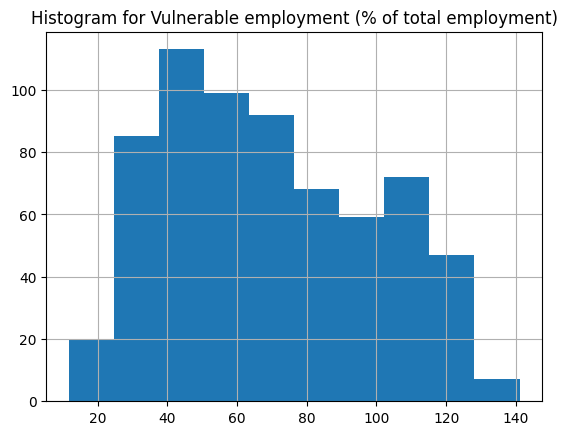

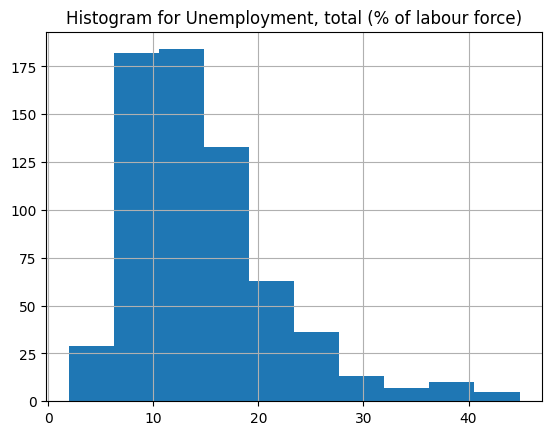

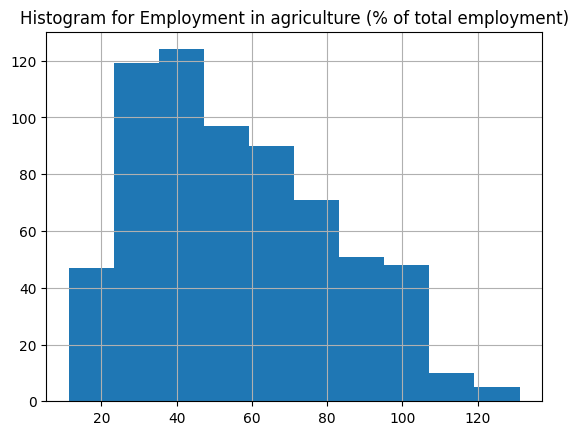

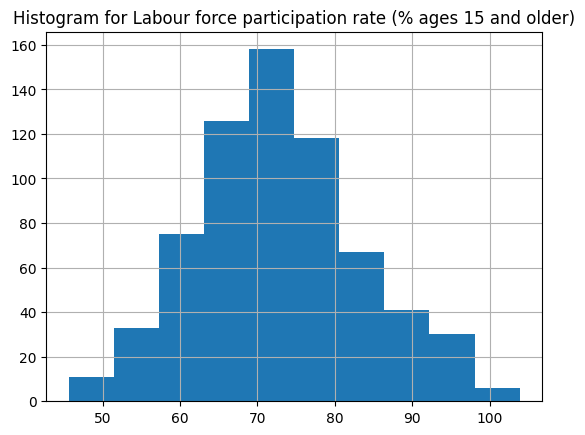

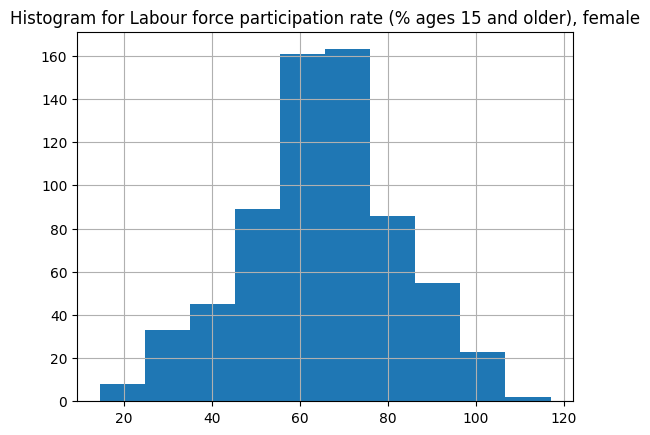

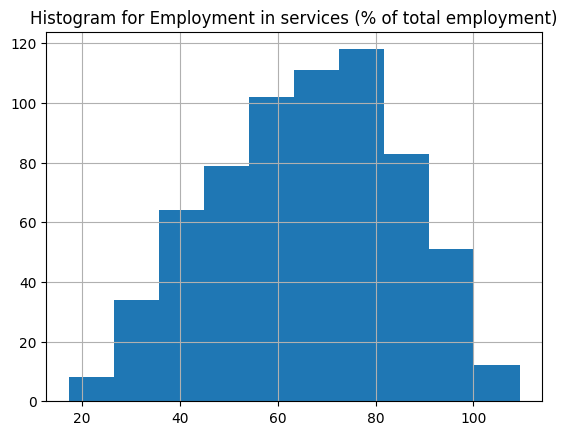

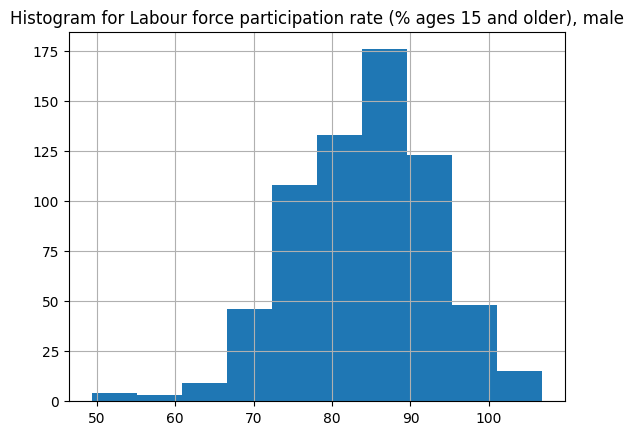

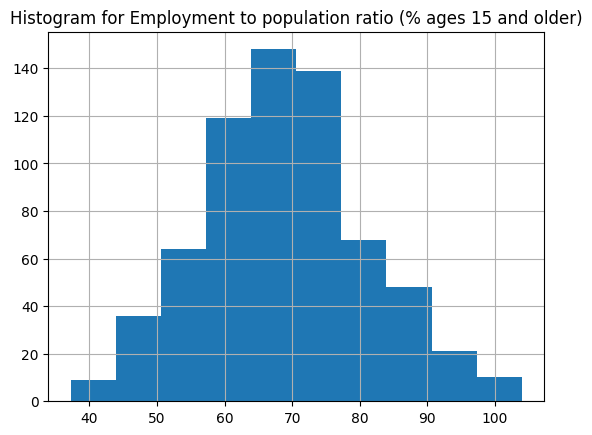

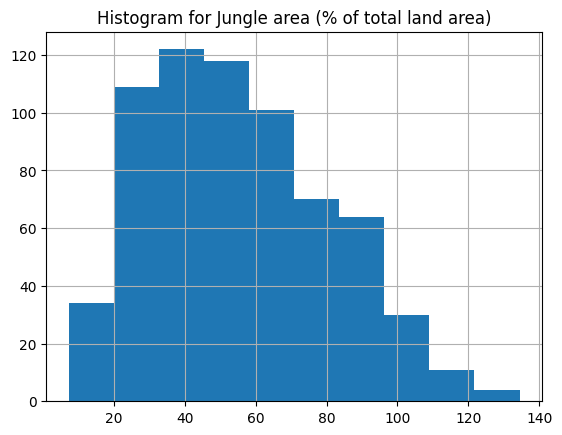

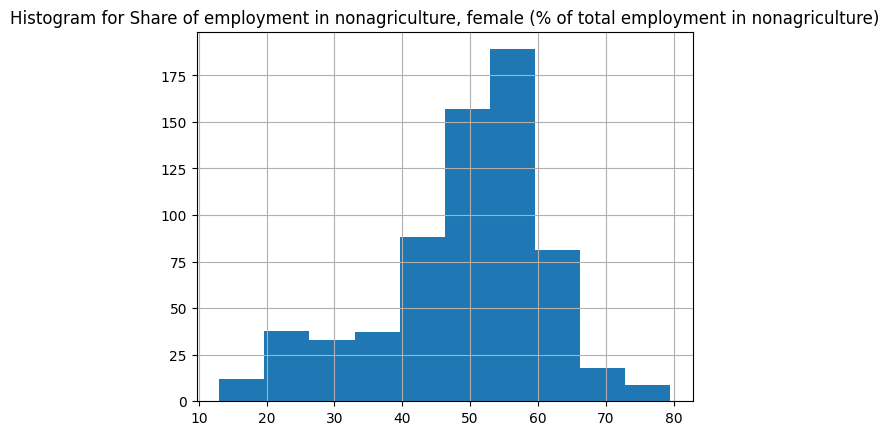

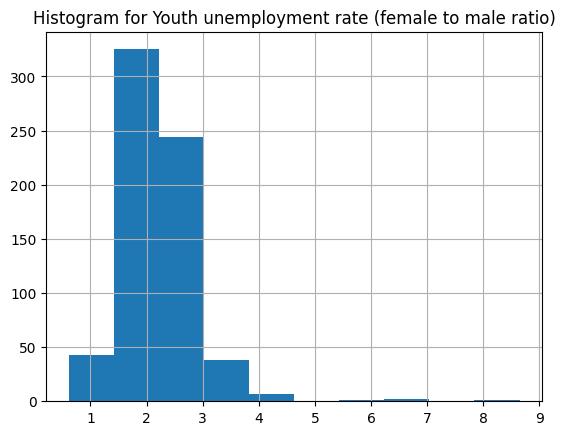

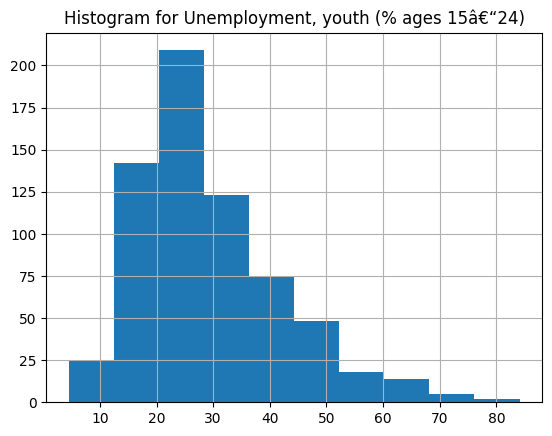

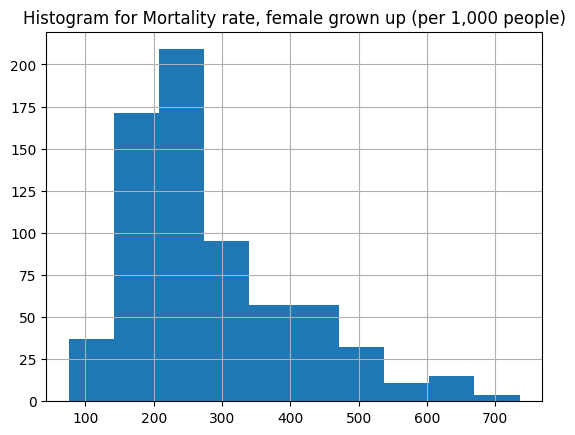

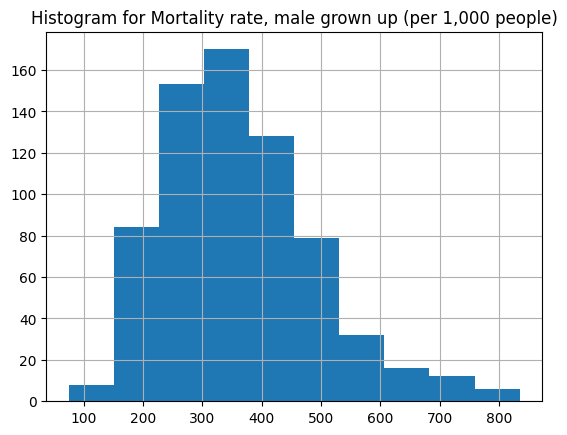

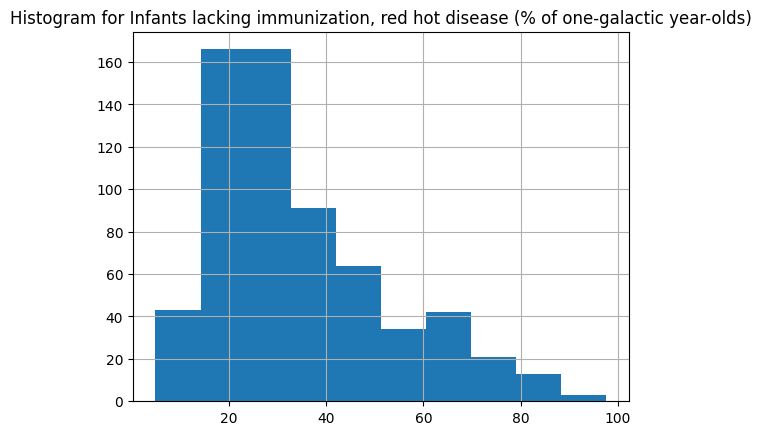

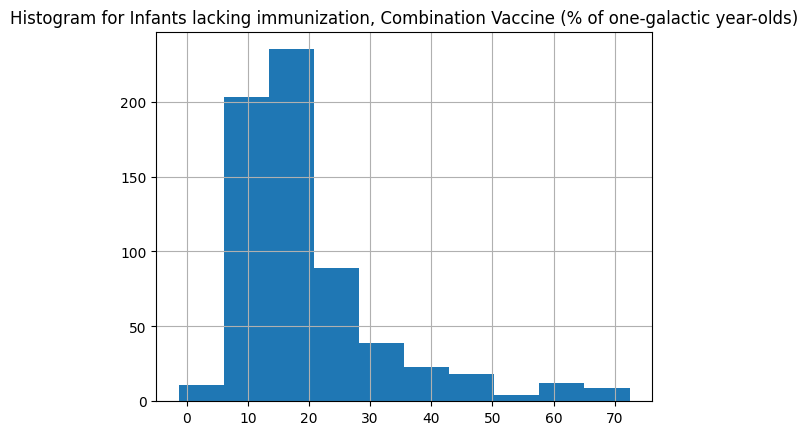

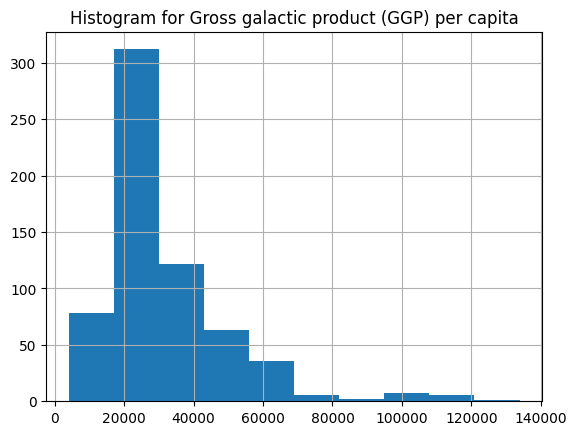

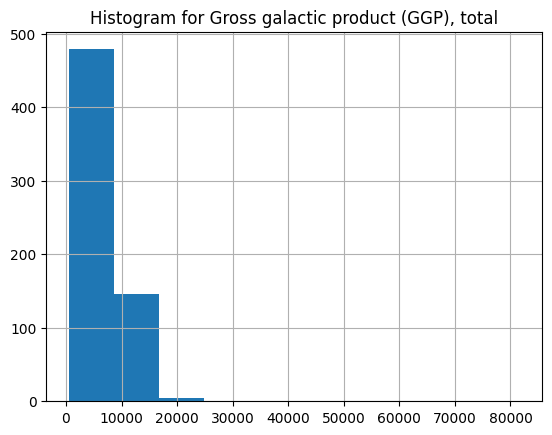

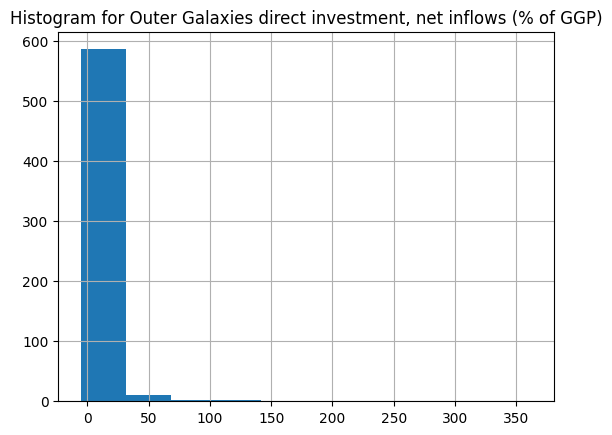

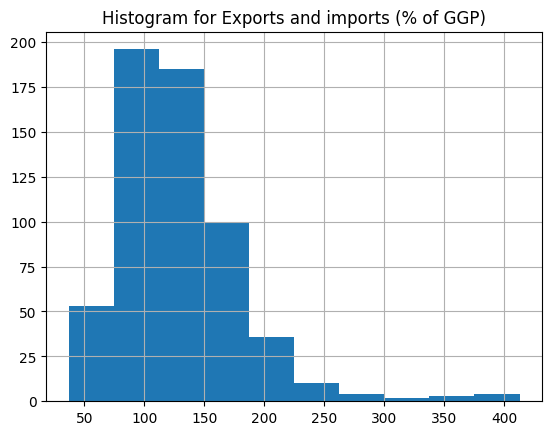

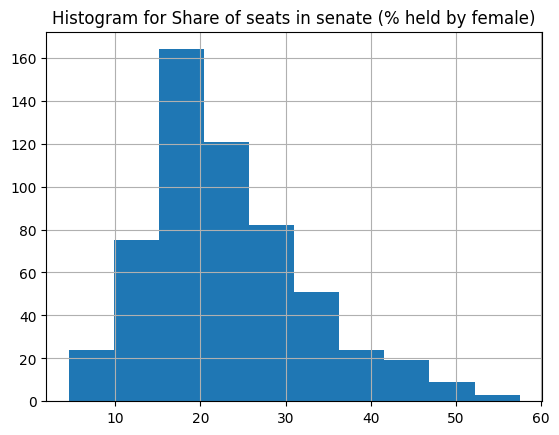

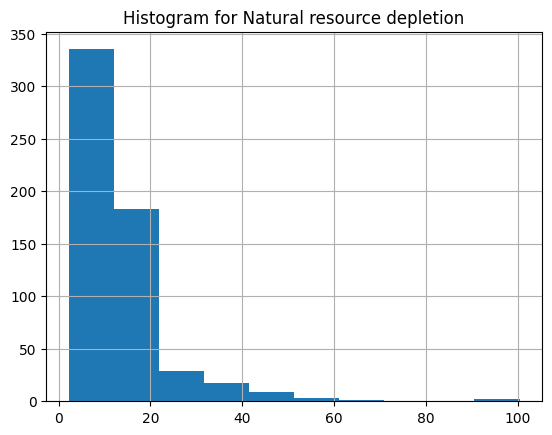

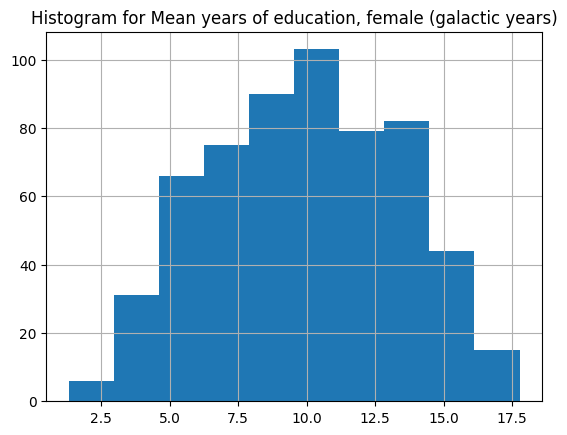

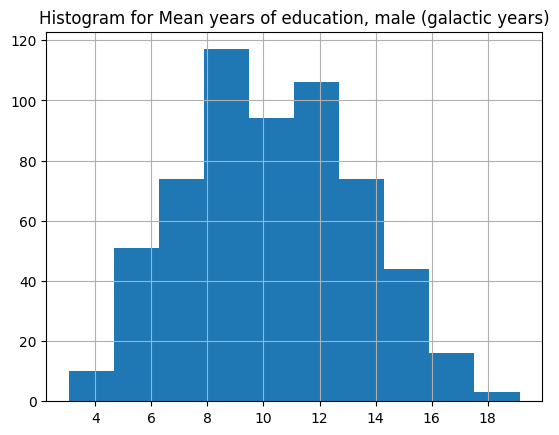

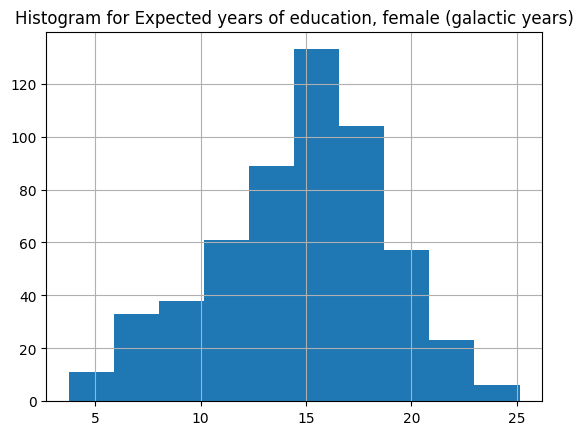

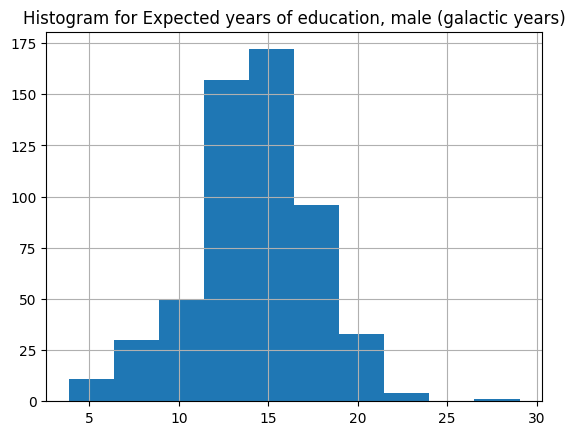

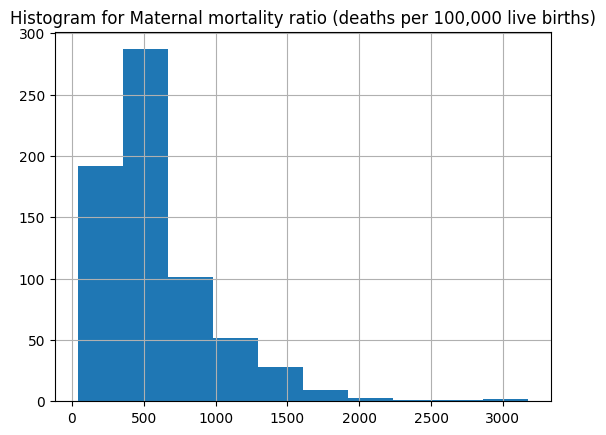

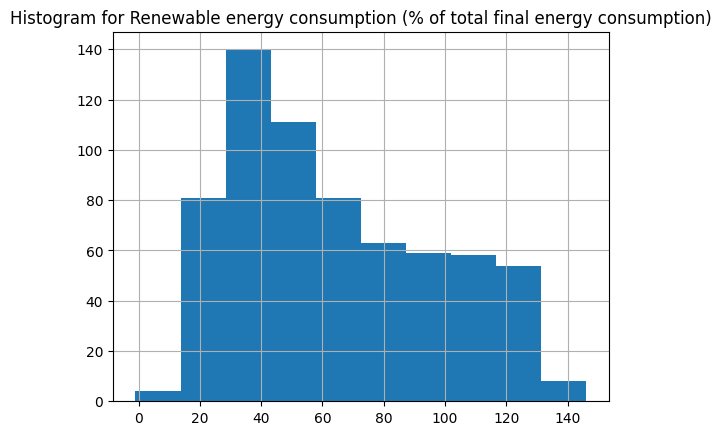

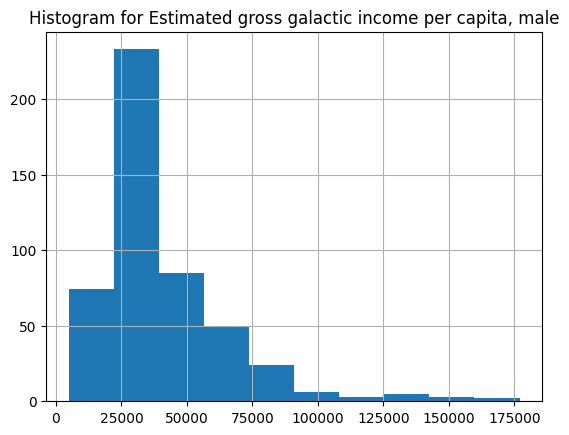

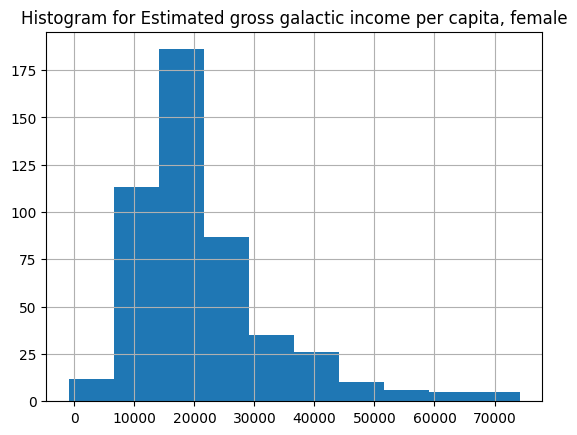

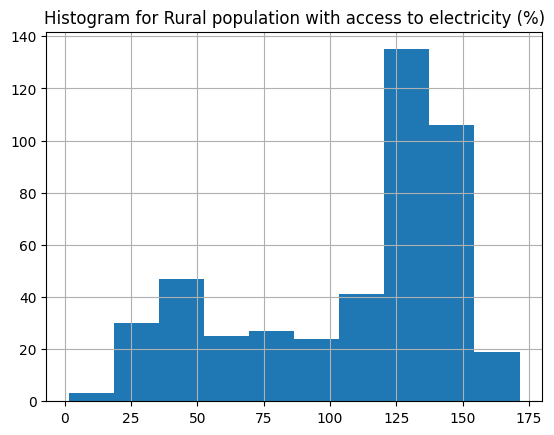

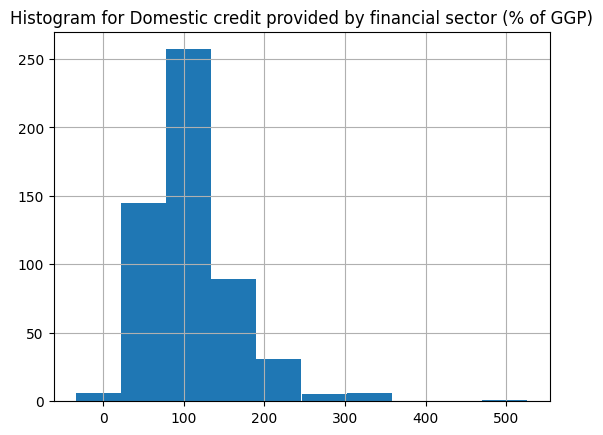

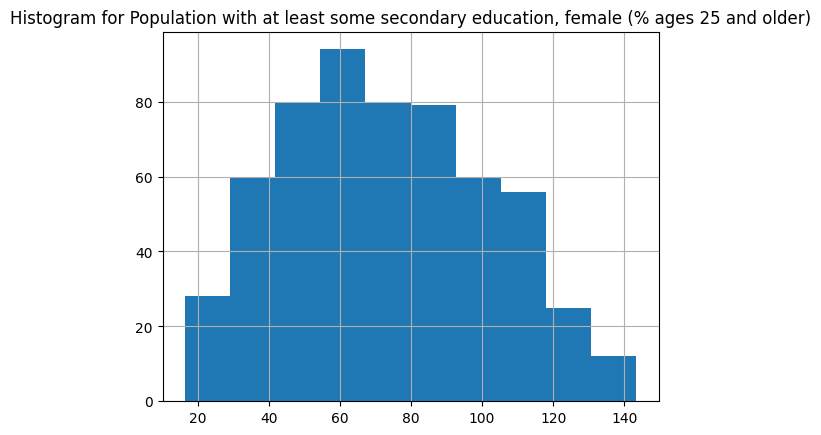

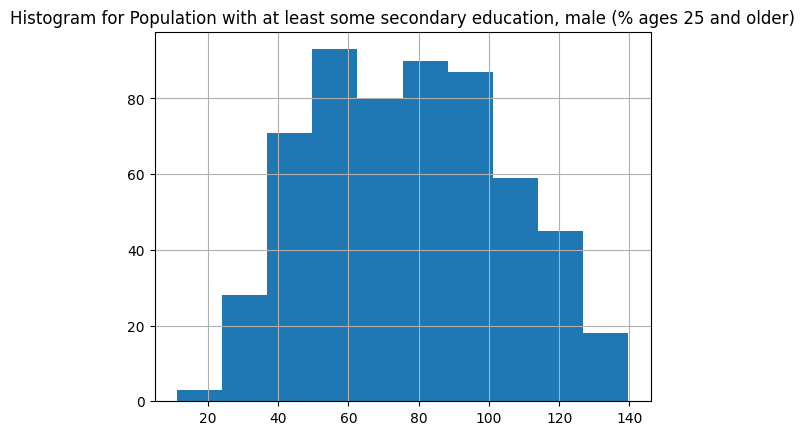

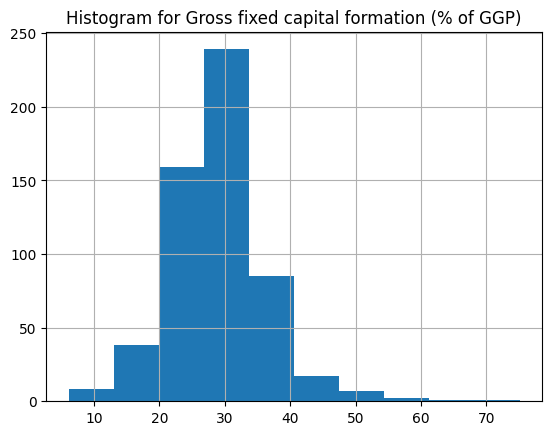

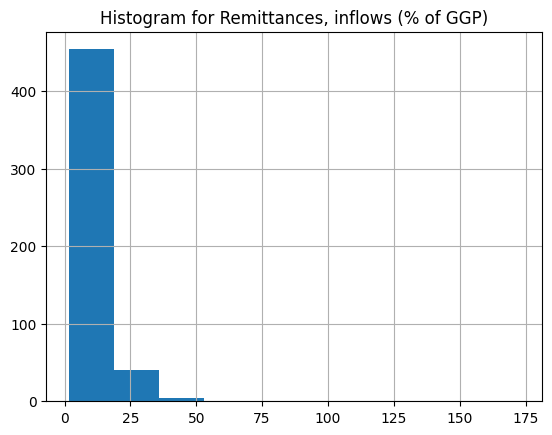

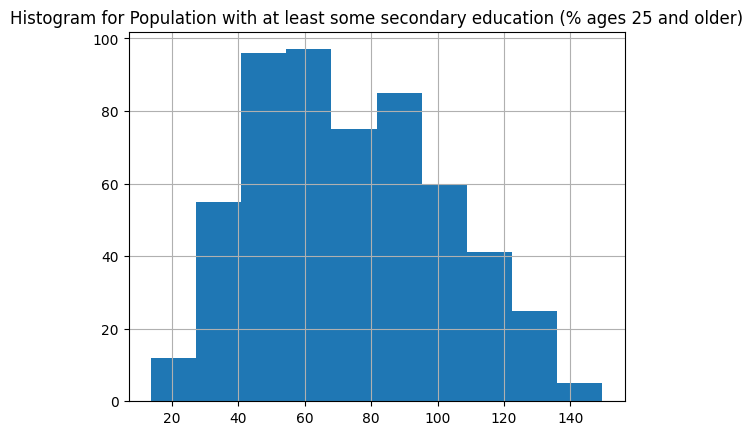

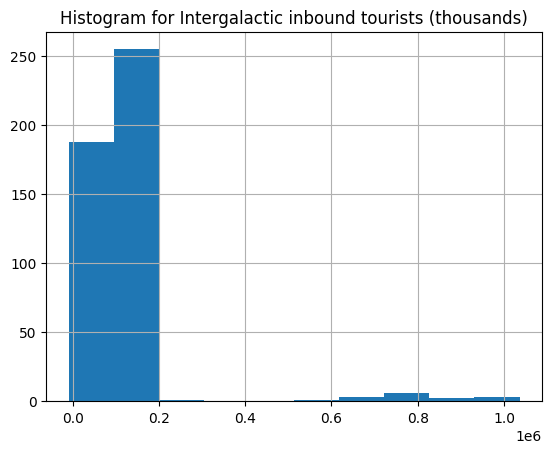

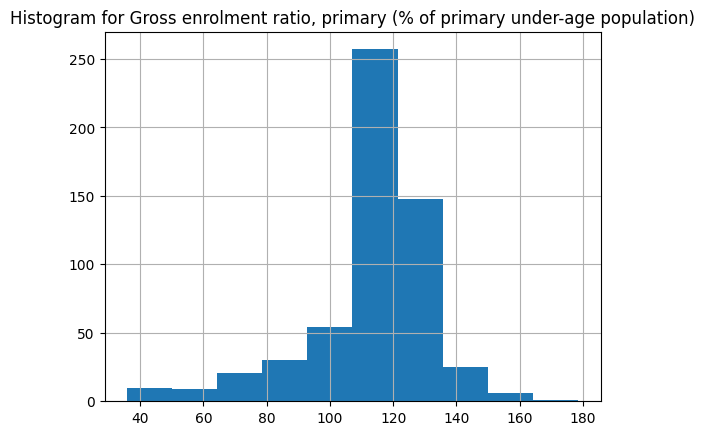

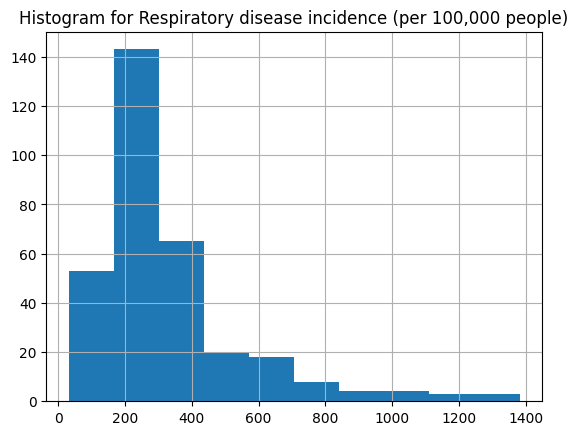

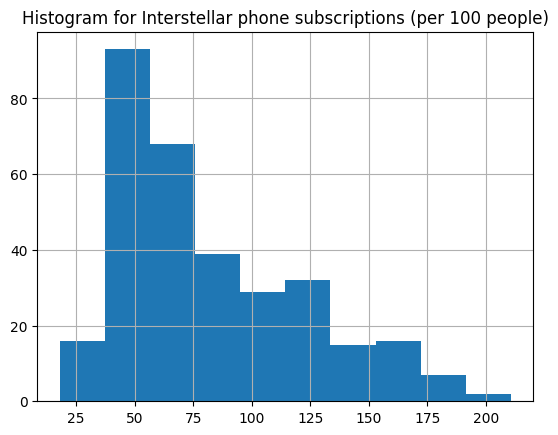

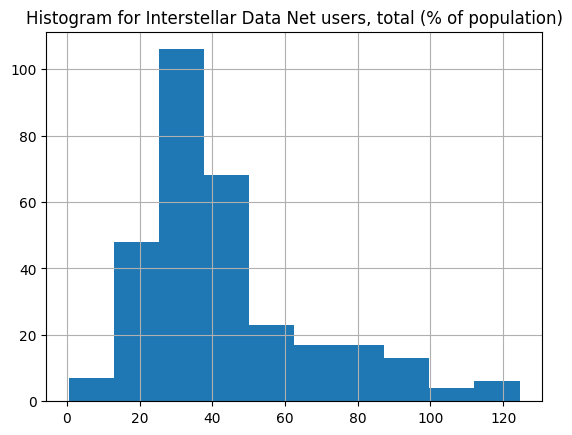

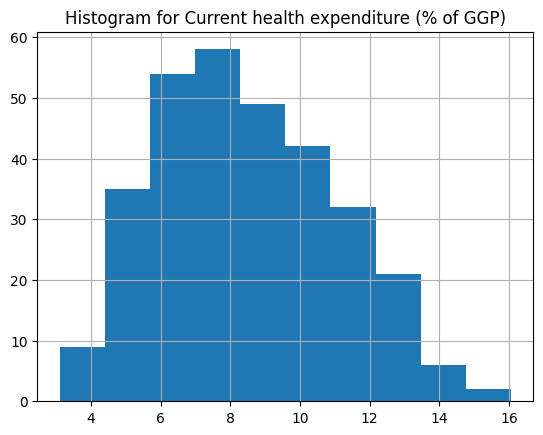

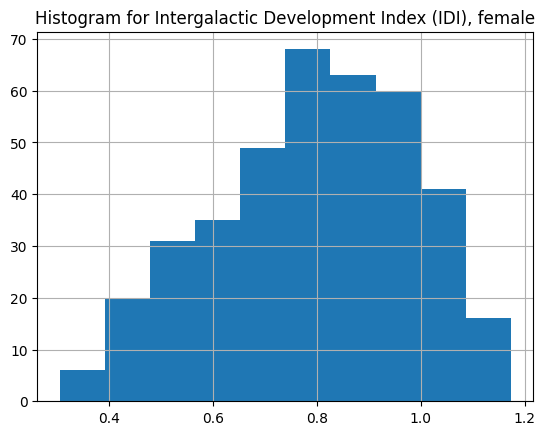

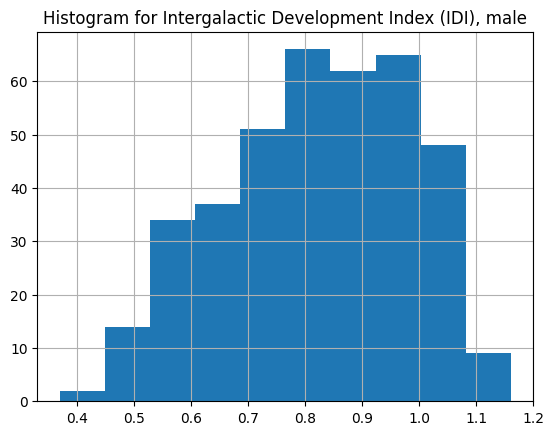

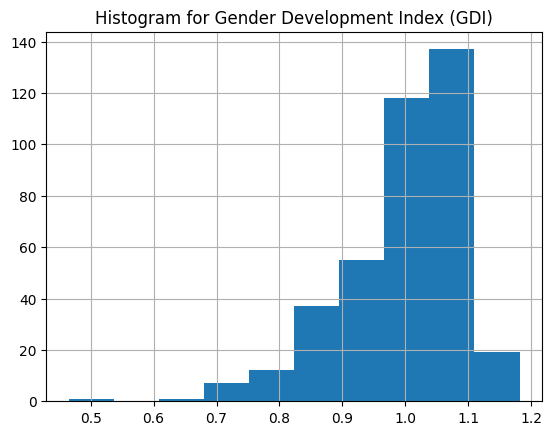

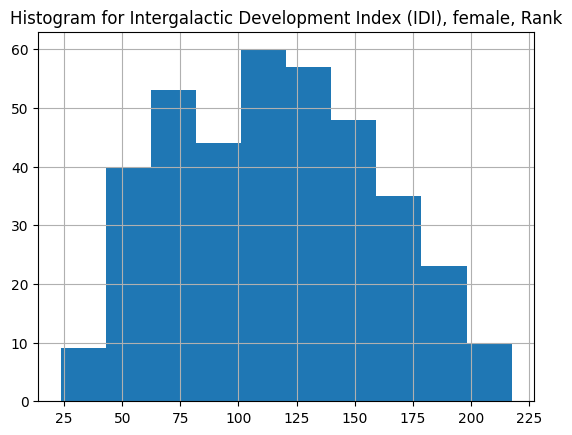

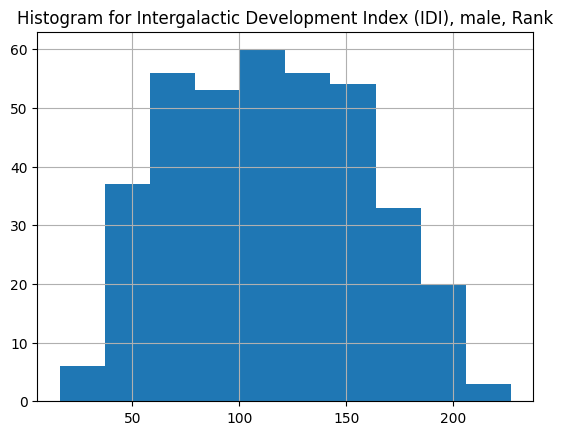

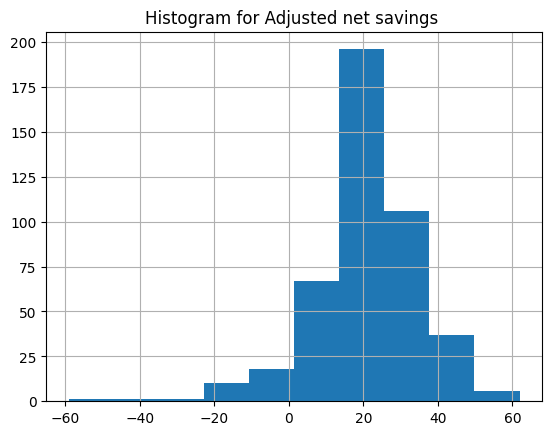

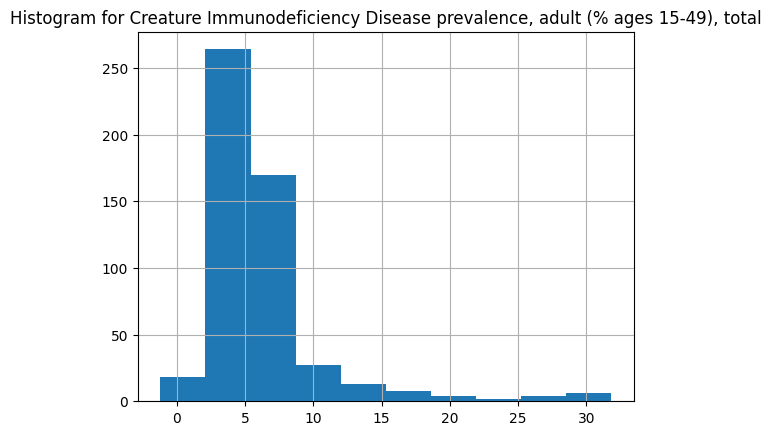

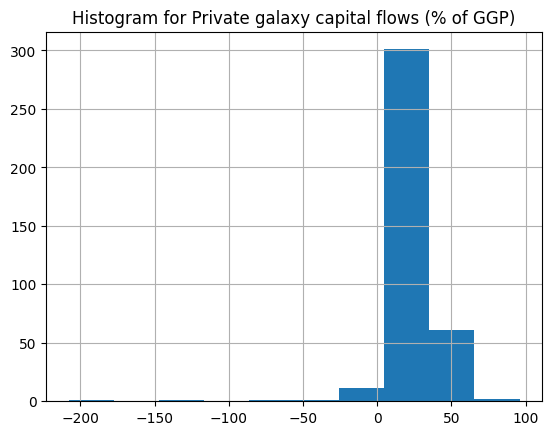

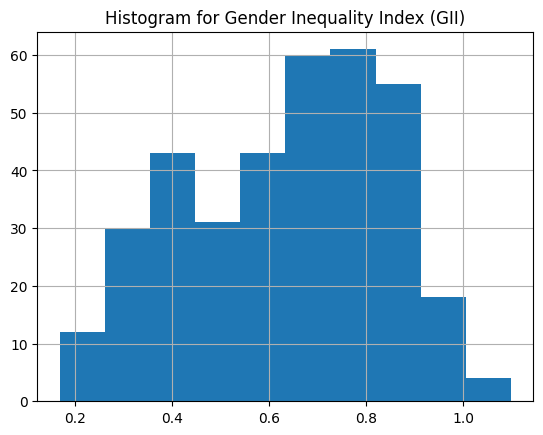

In [48]:
hist_df = correlational_df
for col in hist_df.columns:
    plt.figure();
    hist_df[col].hist()
    hist_title = "Histogram for " + str(col)
    plt.title(hist_title)

#### Assessment Finding


## Assessment Findings

2. The `galactic year` column is of type `Integer` and the `galaxy column` is of type `object`. Every `other` column has `float` as the datatype.
3. Some of the columns, despite the column header indicating that they hold percentages, have some of the entries greater than 100.
4. 

## Training the Model